# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

# Load Data

In [ ]:
books_df = pd.read_csv(r"D:\renat\Documents\Data Science Projects\Book Recommender System\bestsellers with categories.csv")

# Exploratory Data Analysis

To understand and get a sense of what the data is all about and what questions can be answered with it, I will first perform EDA, and then go onto data cleaning.

Inspect the first five rows of the dataframe

In [ ]:
books_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
#Summary of missing values, data types and memory usage
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Let's take a look at the unique values in each categorical column

In [ ]:
for col in books_df:
    if books_df[col].dtype == 'object':
        unique_values = books_df[col].value_counts()
        print("The unique values for column ", col, "are ",unique_values)
        print("---------------------------------------------------------")

The unique values for column  Name are  Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64
---------

Statistical descriptions

In [ ]:
books_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Looking at the distribution of numerical data with histograms

In [ ]:
#Import libraries

import seaborn as sns
import matplotlib.pyplot as plt

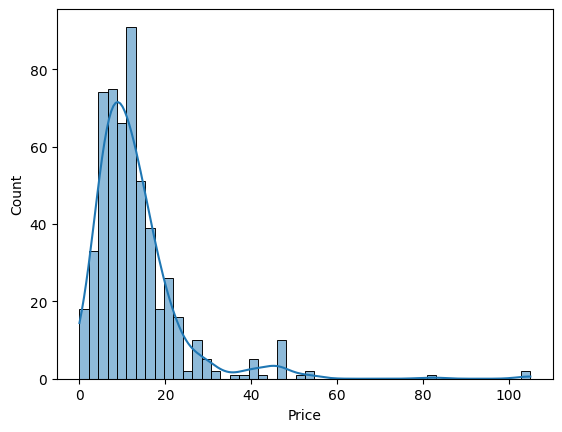

In [ ]:
sns.histplot(data=books_df, x="Price", kde=True)
plt.show()

We can see that the prices of most of our books fall in the 2000 category

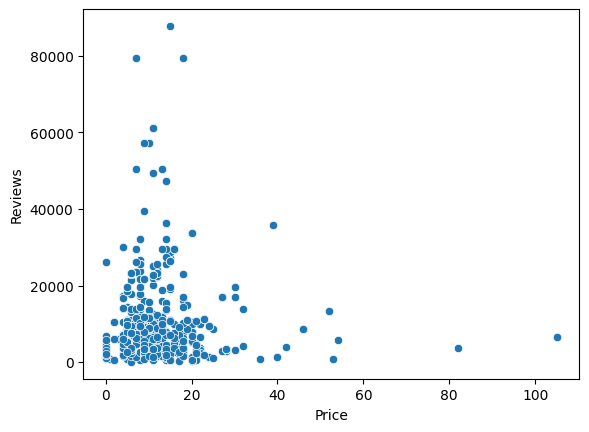

In [ ]:
sns.scatterplot(data=books_df, x="Price", y="Reviews")
plt.show()

Create a boxplot to visualize the relationship between a categorical and numerical value

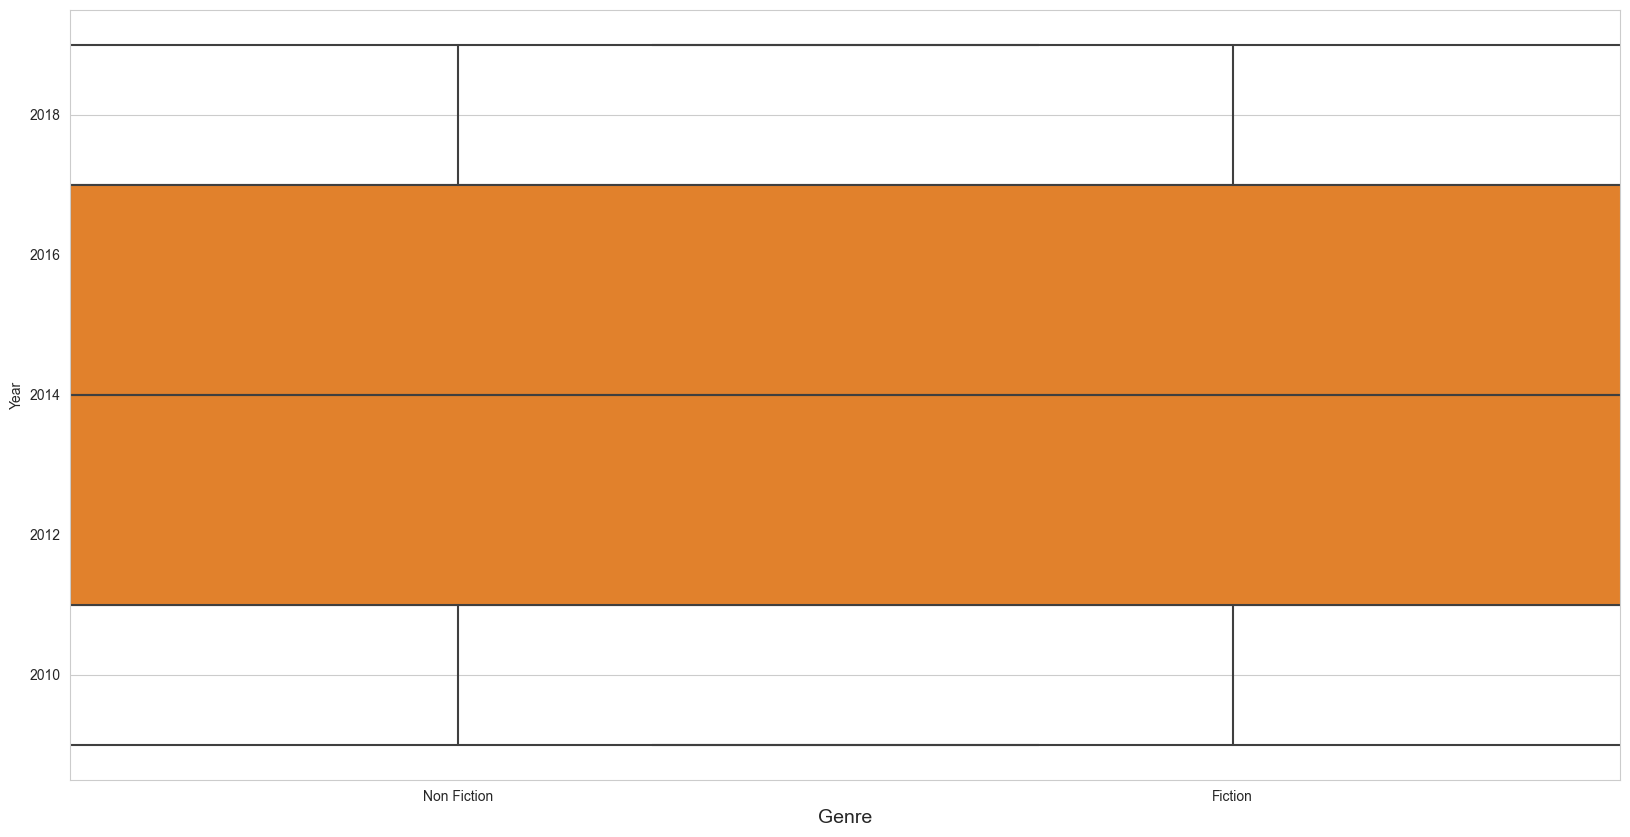

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=books_df, x="Genre", y="Year", ax=ax, width=3)
ax.set_xlabel("Genre", fontsize=14)
ax.set_ylabel("Year")
plt.show()

To visualize the relationship between two categorical values, we can use a contingency table and visualize it as a heatmap.

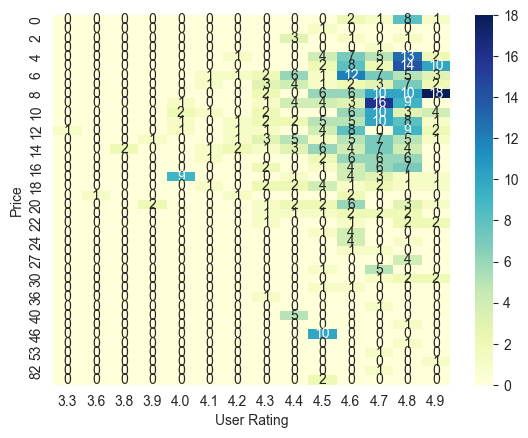

In [ ]:
contingency_table = pd.crosstab(books_df['Price'], books_df['User Rating'])
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

Visualizar distribucion de variable categorica

In [ ]:
books_df['Genre'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object>

Investigate correlation

In [ ]:
books_df.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_2428\2074717246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  books_df.corr()


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


A negative correlation coefficient indicates that as one variable increases, the other decreases. A value closer to zero, is indicative of a weak relationship, while values closer to 1 or -1, indicates stronger relationships.
The .corr() calculates the Pearson correlation coefficient, measuring the linear relationship between the two variables.
We can visualize the correlation in a heatmap 

C:\Users\PC\AppData\Local\Temp\ipykernel_2428\333201138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(books_df.corr(), annot=True)


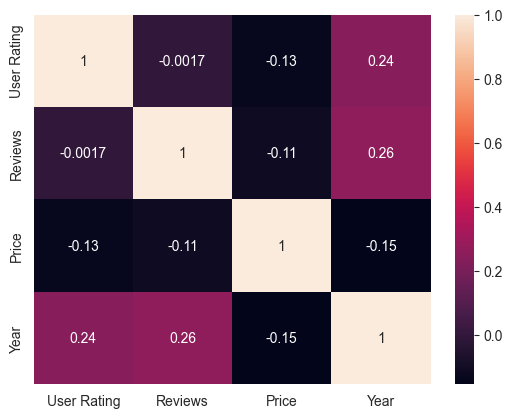

In [ ]:
sns.heatmap(books_df.corr(), annot=True)
plt.show()

The strong positives and negative correlations represented in deep purple and beige respectevely, are easier to spot.
We always have to interpret them within the context of our data.
Also, variables can have a strong non-linear relationship and a Pearson correlation coefficient close to zero.
We complement them with scatter plots

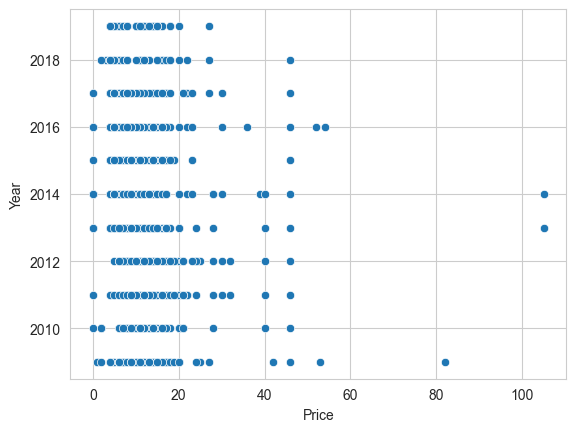

In [ ]:
sns.scatterplot(data=books_df, x="Price", y="Year")
plt.show()

Pairplot traza todas las relaciones por pares entre variables numericas en una visualizacion

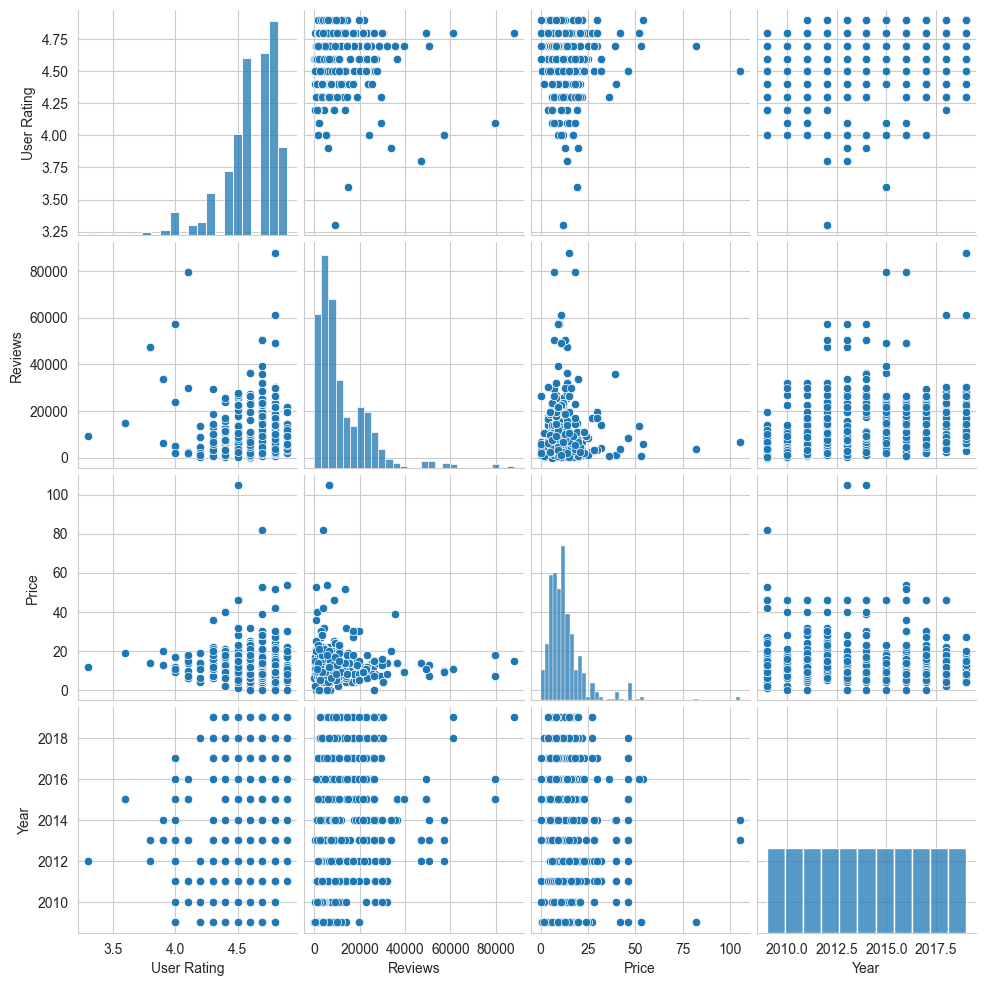

In [ ]:
sns.pairplot(data=books_df)
plt.show()

Exploring categorical relationships

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


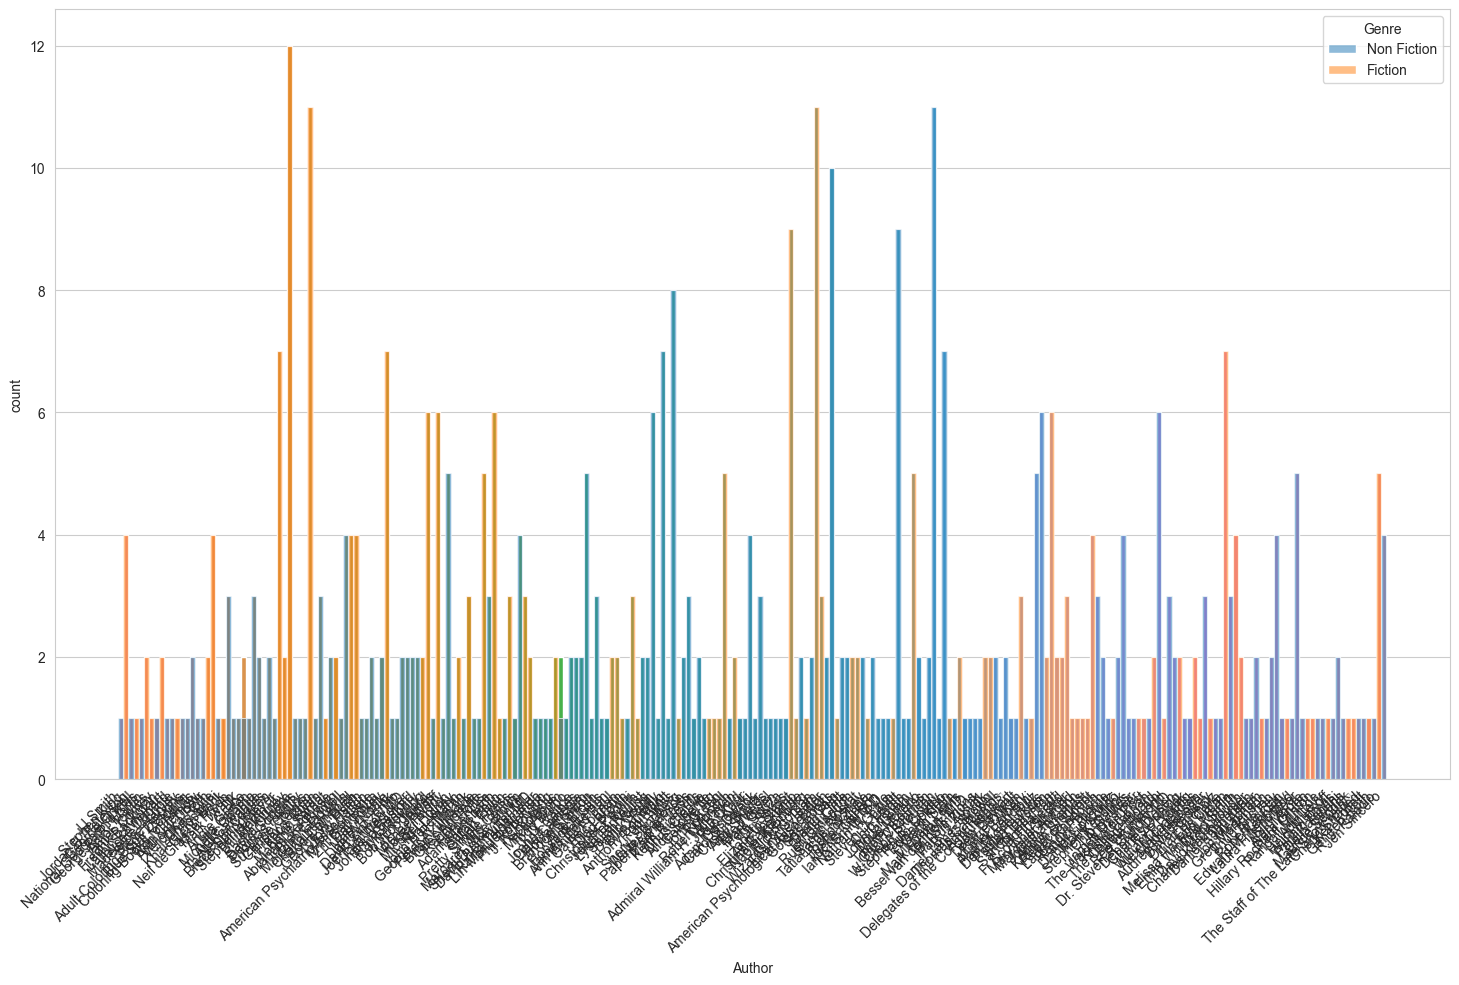

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18, 10))
sns.countplot(data=books_df, x='Author', ax=ax, width=0.8)

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#LIMITAR LA CANTIDAD DE AUTORES
sns.histplot(data=books_df, x="Author", hue="Genre", binwidth=1)
plt.show()

# Preprocessing and Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import openpyxl
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Get unique values of column "neighbourhood"
genres = books_df['Genre'].unique()

# Print unique values
print(genres)

['Non Fiction' 'Fiction']


In [ ]:
# Codificación binaria para la columna 'Genre'
books_df_encoded = books_df.copy()  # Crear una copia del DataFrame original
books_df_encoded['Genre'] = (books_df_encoded['Genre'] == 'Fiction').astype(int)

# No es necesario eliminar las columnas originales 'Genre', 'Name' y 'Author'

# Guardar el conjunto de datos preprocesado en un archivo CSV
books_df_encoded.to_csv('books_df_preprocessed.csv', index=False)

print(books_df_encoded.columns)


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Preparar los datos para el entrenamiento
X = books_df_encoded[['User Rating', 'Reviews', 'Price', 'Year']]  # Variables predictoras
y = books_df_encoded['Genre']  # Variable objetivo 'Genre'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Hacer predicciones con el modelo SVM
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Precisión del modelo SVM:', accuracy_svm)

# Mostrar el informe de clasificación del modelo SVM
print('Informe de clasificación del modelo SVM:')
print(classification_report(y_test, y_pred_svm))

# Entrenar un modelo de Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

# Hacer predicciones con el modelo GBM
y_pred_gbm = gbm_model.predict(X_test)

# Calcular la precisión del modelo GBM
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print('Precisión del modelo GBM:', accuracy_gbm)

# Mostrar el informe de clasificación del modelo GBM
print('Informe de clasificación del modelo GBM:')
print(classification_report(y_test, y_pred_gbm))

Precisión del modelo SVM: 0.6636363636363637
Informe de clasificación del modelo SVM:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        58
           1       0.69      0.52      0.59        52

    accuracy                           0.66       110
   macro avg       0.67      0.66      0.65       110
weighted avg       0.67      0.66      0.66       110

Precisión del modelo GBM: 0.8272727272727273
Informe de clasificación del modelo GBM:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        58
           1       0.92      0.69      0.79        52

    accuracy                           0.83       110
   macro avg       0.85      0.82      0.82       110
weighted avg       0.84      0.83      0.82       110



"\n# Preparar los datos para el entrenamiento\nX = books_df_encoded[['User Rating', 'Reviews', 'Price', 'Year']]  # Variables predictoras\ny_fiction = books_df_encoded['Genre_Fiction']  # Variable objetivo 'Genre_Fiction'\ny_nonfiction = books_df_encoded['Genre_Non Fiction']  # Variable objetivo 'Genre_Non Fiction'\n\n# Dividir los datos en conjuntos de entrenamiento y prueba para 'Genre_Fiction'\nX_train_fiction, X_test_fiction, y_train_fiction, y_test_fiction = train_test_split(X, y_fiction, test_size=0.2, random_state=42)\n\n# Dividir los datos en conjuntos de entrenamiento y prueba para 'Genre_Non Fiction'\nX_train_nonfiction, X_test_nonfiction, y_train_nonfiction, y_test_nonfiction = train_test_split(X, y_nonfiction, test_size=0.2, random_state=42)\n\n# Entrenar un modelo de regresión logística para 'Genre_Fiction'\nlogreg_fiction = LogisticRegression()\nlogreg_fiction.fit(X_train_fiction, y_train_fiction)\n\n# Hacer predicciones con el modelo de regresión logística para 'Genre_Fi